## 라이브러리 로드

In [1]:
# pandas, seaborn, numpy, matplotlib.pyplot 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(pd.__version__)
print(sns.__version__)

1.2.4
0.11.1


In [3]:
# 0.11.0 버전에서 변화가 많으니 이 버전 이상을 사용해 주세요. 
# !pip install seaborn --upgrade

In [4]:
# plt.figure(figsize = (12,4)) > 사이즈를 조절하고
# sns.barplot(data = df, x = 'origin', y = 'mpg', ci=None) > 그 안에 원하는 그래프를 크기에 맞게 넣는 형태.

## 데이터셋 불러오기

In [5]:
# mpg 데이터셋을 불러옵니다.
# df
# sns.load_dataset('mpg')
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")
df.shape

(398, 9)

## 데이터셋 일부만 가져오기

In [6]:
# head
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
# tail
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## 요약하기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


##  결측치 보기

In [9]:
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

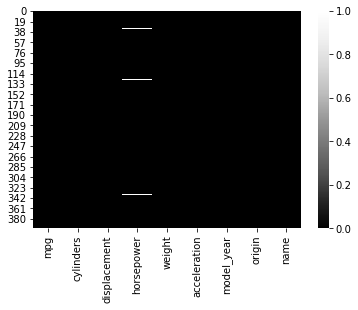

In [10]:
sns.heatmap(df.isnull(), cmap = 'Greys_r') # cmap = 'Greys_r' 결측치는 하앟게
# horsepower에 결측치가 있다  + 대략적인 위치 등 (시각적으로 볼수도있음)

# ex. 비회원 구매의 경우 > 어떤 구간에는 아이디가 비어있는데 특정 시기에 비회원이 구매를 했구나 등의 사실도 확인 가능

## 기술통계

In [11]:
# describe 를 통해 범주형 변수에 대한 기술통계를 보기  >> 범주형 변수(
df.describe(include = 'object')

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


## 범주형 변수
### 범주형 데이터 유일값의 빈도수

In [12]:
# nunique 값 구하기
df.nunique()

# cylinders 와 model_year 는 수치형 데이터이지만 범주형에 가까운 특성을 가진다.

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

<AxesSubplot:xlabel='count', ylabel='origin'>

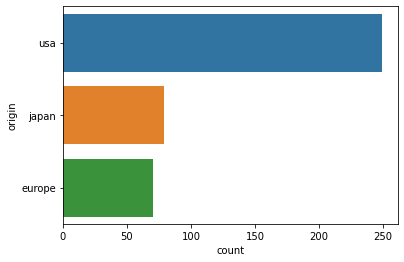

In [13]:
# countplot 으로 origin 빈도수 시각화 하기
#sns.countplot(data = df, x = 'origin')

sns.countplot(data = df, y = 'origin')
## countplot 은  x 와 y 둘중 하나에만 사용해야만하고 > 하나에 적용시켜주면 알아서 나타내줌

### 1개 변수의 빈도수

In [14]:
# origin 의 빈도수 구하기
df['origin'].value_counts() # 결측치 값은 세지 않음

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 2개 이상의 변수에 대한 빈도수

<AxesSubplot:xlabel='origin', ylabel='count'>

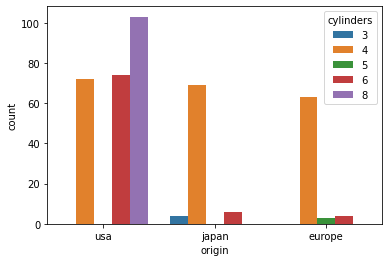

In [15]:
# countplot 으로 origin 의 빈도수를 시각화 하고 cylinders 로 다른 색상으로 표현하기

sns.countplot(data = df, x = 'origin', hue = 'cylinders')

# cylinders 

<AxesSubplot:xlabel='cylinders', ylabel='count'>

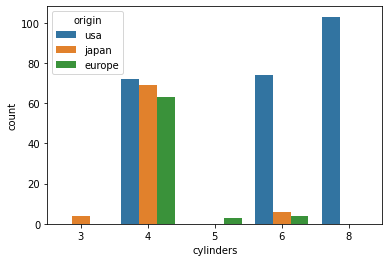

In [16]:
# countplot 으로 cylinders 의 빈도수를 시각화 하고 origin 으로 다른 색상으로 표현하기


sns.countplot(data = df, x = 'cylinders', hue = 'origin')

# 미국차는 cylinders 개수가 많은 편이다,,

In [17]:
# pd.crosstab 으로 시각화한 값 직접 구하기

pd.crosstab(df['origin'], df['cylinders']) # pd.crosstab(행, 열)

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


### 범주형 vs 수치형 변수

<AxesSubplot:xlabel='origin', ylabel='mpg'>

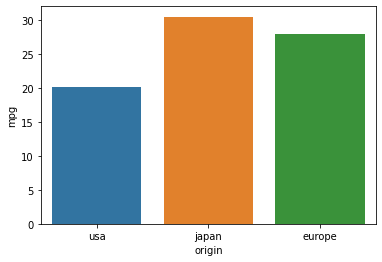

In [18]:
# barplot 으로 origin 별 mpg 값 구하기
# sns.barplot(data = df, x = 'origin', y = 'mpg')
# 막대의 검은색 막대 = 신뢰구간을 나타내고있음

sns.barplot(data = df, x = 'origin', y = 'mpg', ci=None) #ci=None 신뢰구간 제외해서 그리기


### groupby 를 통한 연산

In [19]:
# groupby를 통해 origin 별로 그룹화 하고 mpg 의 평균 구하기
# df.groupby("origin").mean()
# df.groupby("origin").mean()['mpg']
# df.groupby("origin")['mpg'].mean()
df.groupby(["origin", "cylinders"])['mpg'].mean() # df.grounby(인덱스)[컬럼]  # df.groupby( by = ["origin", "cylinders"])
# groupby() >> 함수라서 ()로 시작하고 / 인덱스 값이 2개일때는 by 값에 두가지 값을 모두 입력시키기 위해 [] 형태로 묶어준다.

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

### pivot table을 통한 연산

In [20]:
# pivot_table 로 같은 값 구하기
pd.pivot_table(data = df, index = 'origin', values = 'mpg' ) # aggfunc 의 기본값이 평균이라 별도 mean() 적용하지 않음

# pivot 은 데이터의 형태를 바꿀때 
# pivot_table 은 

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


In [ ]:

#pd.pivot_table??

# pivot_table 를 감싸둔게 crosstab
# groupby 를 감싸둔게 pivot_table
# 사용하기 쉽게 만든 것
#### crosstab count??? >> 내용 문의할것

<AxesSubplot:xlabel='origin', ylabel='mpg'>

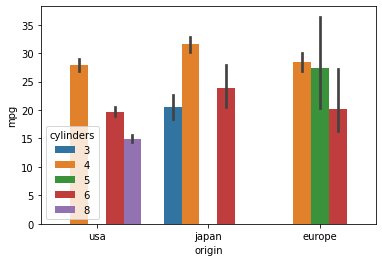

In [41]:
# barplot 으로 합계 값 구하기
sns.barplot(data = df, x = "origin", y = "mpg", hue = "cylinders")

In [63]:

# barplot 에 hue 를 사용하여 색상을 다르게 표현해 보기


In [64]:
# groupby 를 통해 위 그래프 시각화에 대한 값 구하기
a = df.groupby(["origin", "cylinders"])["mpg"].mean()
print(a)

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64


In [65]:
# pivot_table 를 통해 위 그래프 시각화에 대한 값 구하기 
b = df.pivot_table(index = ["origin", "cylinders"], values = "mpg")
print(b)

### pd.pivot_table(data = df, index = , values = )   > 데이터를 앞에다 지정하느냐 뒤에 파라미터 값으로 넘기는냐의 차이로 작성방식이 다를 수 있음

                        mpg
origin cylinders           
europe 4          28.411111
       5          27.366667
       6          20.100000
japan  3          20.550000
       4          31.595652
       6          23.883333
usa    4          27.840278
       6          19.663514
       8          14.963107


<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

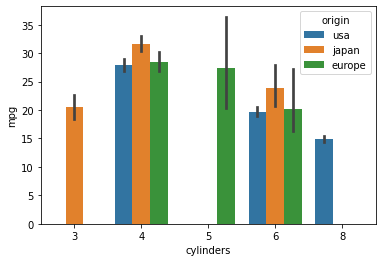

In [66]:
# cylinders 와 mpg 의 x, hue 값을 변경해서 시각화
sns.barplot(data = df, x = "cylinders", y = "mpg", hue = "origin")

### boxplot과 사분위수

<AxesSubplot:xlabel='origin', ylabel='mpg'>

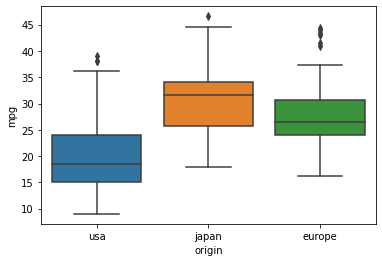

In [67]:
# boxplot 으로 origin 별 mpg 의 기술통계 값 구하기
sns.boxplot(data = df, x = "origin" ,y = 'mpg')

# boxplot의 특징으로는 이상치를 제외하고 그래프를 그려준다 
# 평균, 중간값, 이상치를 확인해주는 등 장점이 많지만 > 단점도 존재 : 박스 안의 값이 달라지더라도 그 안에 값을 제대로 표현하지 못하는 문제가 있음

In [71]:
# groupby로 origin 값에 따른 mpg의 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기
desc = df.groupby("origin")["mpg"].describe()
desc

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [75]:
europe = desc.loc['europe']
europe

count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

### 박스플롯 이해하기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

In [82]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기
# Q3
Q3 = europe["75%"]
# Q1
Q1 = europe["25%"]
# IQR
IQR = Q3 - Q1
# OUT_MAX
OUT_MAX =  Q3 +(1.5 * IQR) # 아웃라이어의 최대값
# OUT_MIN
OUT_MIN = Q1 - ( 1.5 * IQR ) # 아웃라이어의 최소값을 구한 것
Q3, Q1, IQR, OUT_MAX , OUT_MIN

(30.65, 24.0, 6.649999999999999, 40.625, 14.025000000000002)

In [80]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<AxesSubplot:xlabel='mpg'>

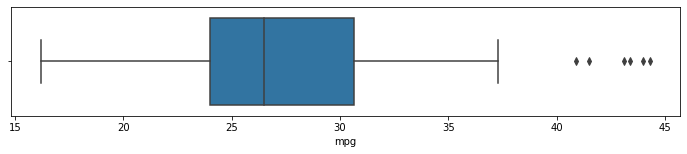

In [83]:
# europe 에 해당되는 값에 대해 boxplot 그리기
plt.figure(figsize = (12, 2))
sns.boxplot(data = df[df["origin"] == "europe"], x = "mpg")

<AxesSubplot:xlabel='mpg'>

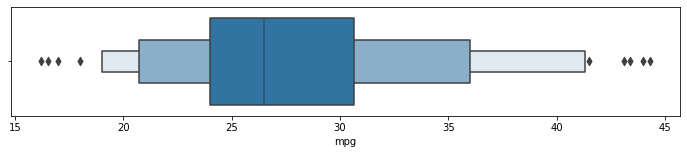

In [84]:
# boxenplot 그리기
plt.figure(figsize = (12, 2))
sns.boxenplot(data = df[df["origin"] == "europe"], x = "mpg")

<AxesSubplot:xlabel='mpg'>

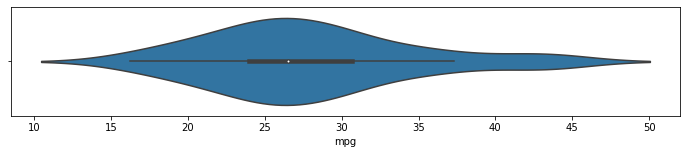

In [86]:
# violinplot 그리기
plt.figure(figsize = (12, 2))
sns.violinplot(data = df[df["origin"] == "europe"], x = "mpg")

### 산점도를 통한 범주형 데이터 표현

<AxesSubplot:xlabel='origin', ylabel='mpg'>

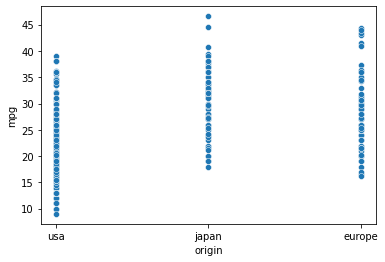

In [88]:
# scatterplot 으로 범주형 변수 그리기
sns.scatterplot(data = df, x = "origin", y = "mpg")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

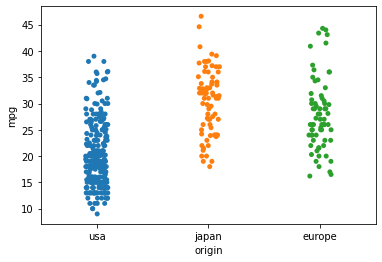

In [89]:
# stripplot
sns.stripplot(data = df, x = "origin", y = "mpg")

## scatterplot 과 다르게 동일 값에 수치를 같은 위치에 두지 않아 비교적 시각적으로 보기 편하다.

In [93]:
# swarmplot
#sns.swarmplot(data = df, x = "origin", y = "mpg")
## 경고 문구 >> 겹쳐서 찍히는 값이 있다 ,, 
plt.figure(figsize = 12, 12)
sns.swarmplot(data = df, x = "origin", y = "mpg")

SyntaxError: positional argument follows keyword argument (<ipython-input-93-7a5b90a4afcc>, line 4)

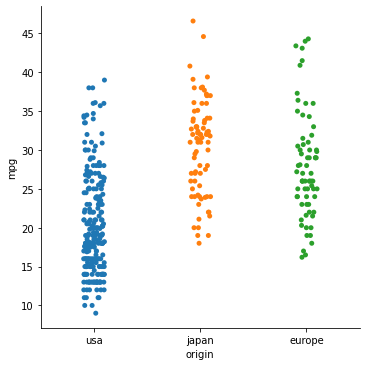

In [94]:
# catplot
sns.catplot(data = df, x = "origin", y = "mpg")

## 서브플롯을 제공하는 플롯에서는 plt.figure로 사이즈 조절이 불가하다 >> height=,  aspect =  값으로 변경해줘야함.

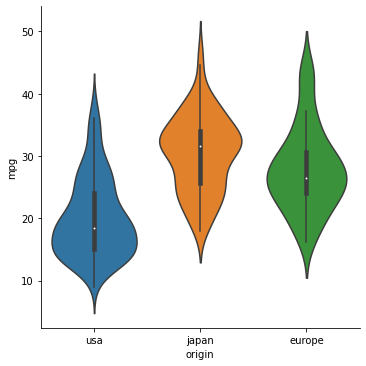

In [97]:
sns.catplot(data = df, x = "origin", y = "mpg", kind = "violin")

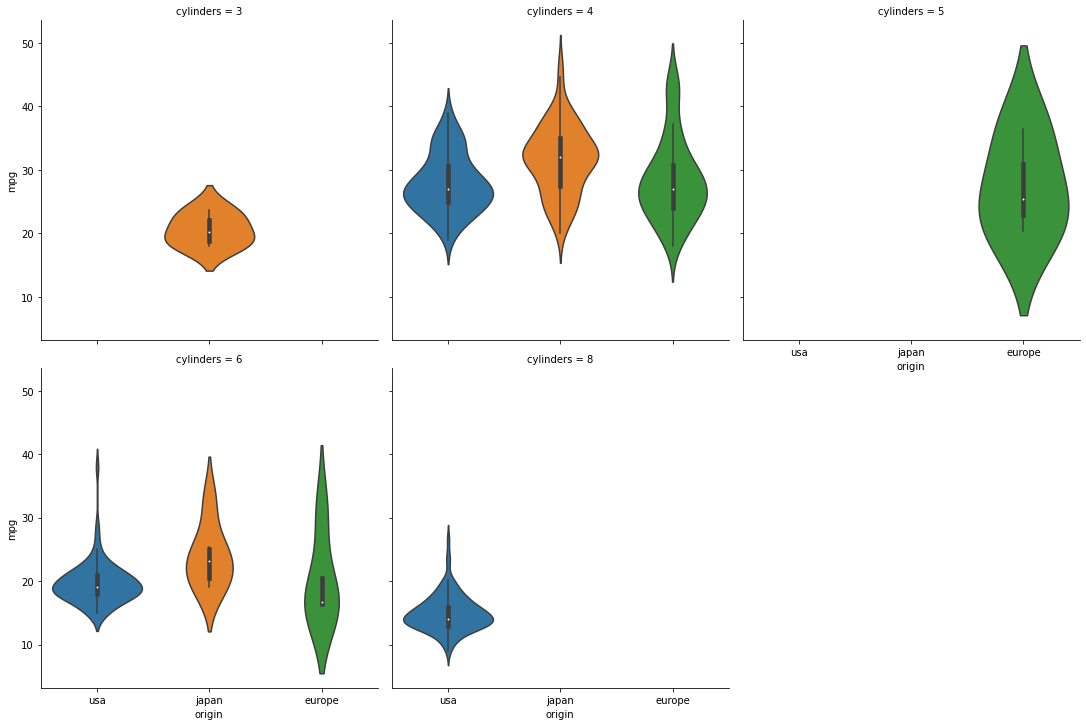

In [98]:
sns.catplot(data = df, x = "origin", y = "mpg", kind = "violin", col= "cylinders", col_wrap = 3) 
# catplot 은 다양한 서브플롯을 그려볼 수 있다 (범주형 데이터에 한해서)

### catplot을 통한 범주형 데이터의 서브플롯 시각화

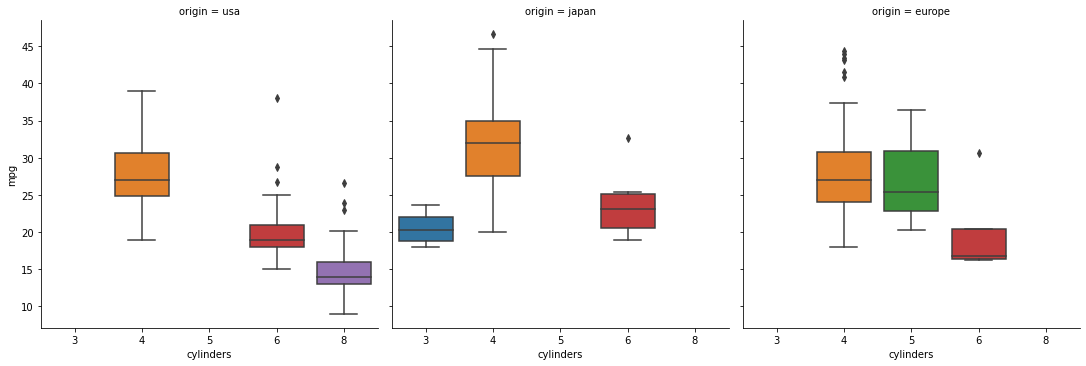

In [101]:
# catplot 으로 boxplot그리기
sns.catplot(data = df, x = "cylinders", y = "mpg", kind = "box", col = "origin")

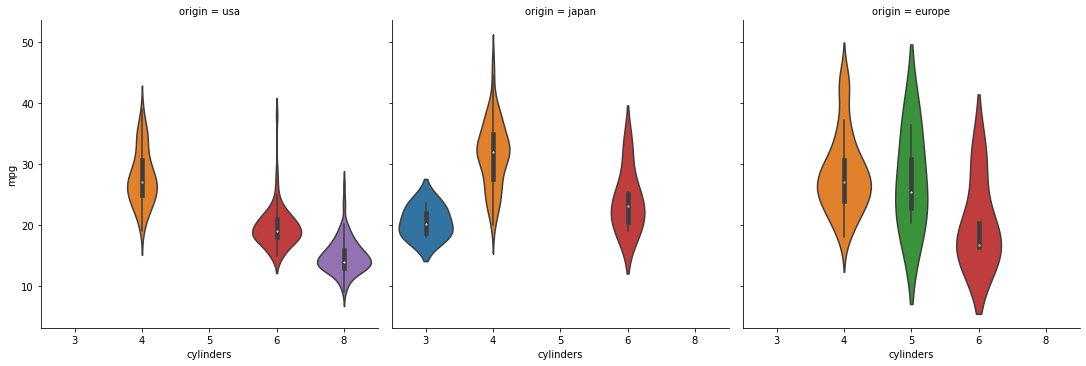

In [102]:
# catplot 으로 violinplot그리기
sns.catplot(data = df, x = "cylinders", y = "mpg", kind = "violin", col = "origin")

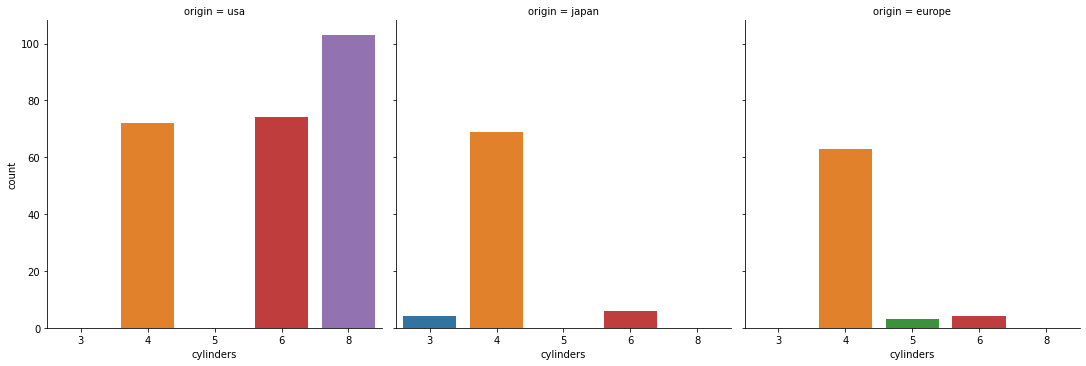

In [104]:
# catplot 으로 countplot그리기
sns.catplot(data = df, x = "cylinders", kind = "count", col = "origin")

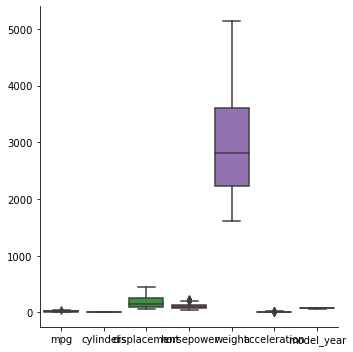

In [108]:
# catplot 으로 boxplot그리기
# df 전체를 넣고 시각화 하기
sns.catplot(data = df, kind = 'box')

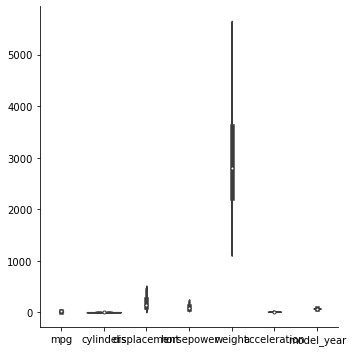

In [109]:
# catplot 으로 violinplot그리기
# df 전체를 넣고 시각화 하기
sns.catplot(data = df, kind = "violin")

# 값

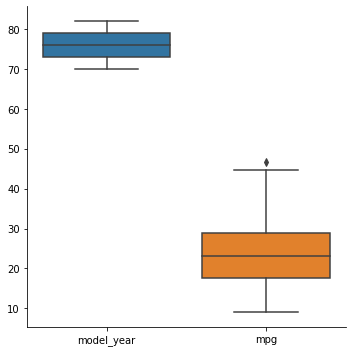

In [115]:
## 특정 값 넣어서 볼때
sns.catplot(data = df[["model_year", "mpg"]], kind = "box") # 숫자 값만 표기됨

# 빼서 볼때는
# data = df.drop([])

In [118]:
# df.select_dtypes(exclude = "object")
df_num = df.select_dtypes(exclude = "object")
df_norm = (df_num - df_num.mean()) / df_num.std()

## 표준화, 정규화 공식
1. 표준화(standardization) :
데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환

(Z-score 표준화) : (측정값 - 평균) / 표준편차

2. 정규화(normalization) :
데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환

(측정값 - 최소값) / (최대값 - 최소값)

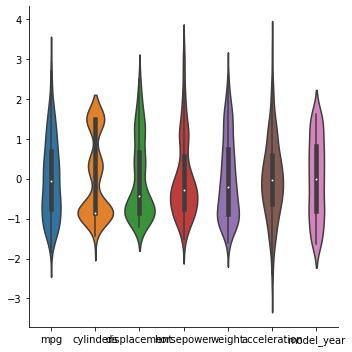

In [119]:
sns.catplot(data = df_norm, kind = "violin")